# Part 3: Analysis
    
    In this notebook we will do funding_type, country analysis, and sector-wise analysis.
    The sector-wise analysis will require us to merge the mapping file with the master. 
    Hence we will do it at last.
    Lets start with funding type analysis

## 1. Funding analysis

    In this we will look at the funding type and funding amount for each of the companies
    We will also have a constraint of investment amount of 5-15 million USD.
    So will look at the funding type with average amount in this range


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/Users/manish/Documents/Projects/data_science/investment_strategy/data/clean_data/master_clean.csv'

In [3]:
master = pd.read_csv(path)


#making a copy of the master file to work on
df = master.copy()
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [4]:
#top investing types
print(df.funding_round_type.value_counts())
print('--'*20)
print(round(100*df.funding_round_type.value_counts()/len(df.index), 2))

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64
----------------------------------------
venture                  54.00
seed                     23.83
debt_financing            7.35
angel                     4.97
grant                     2.19
private_equity            2.06
undisclosed               1.52
convertible_note          1.49
equity_crowdfunding       1.27
post_ipo_equity           0.68
product_crowdfunding      0.37
post_ipo_debt             0.17
non_equity_assistance     0.07
secondary_market          0.03
Name: funding_round_type, dtype: float64


    Types of funding-

    venture - a sum of money investors commit for investment in early-stage companies. 
              The investors who supply the fund with money are designated as limited partners.
    
    seed - is the first official equity funding stage.
    
    debt_financing - loan
    
    angel - one-time/ongoing investment in return for equity
    
    grant - usually from a non-profit
    
    private_equity - investment on a private company in return for equity
    
    convertible_notes- investor would be loaning money to a startup and instead of a return in 
                       the form of principal plus interest, the investor would receive equity in the company.
    
    equity_crowdfunding -  Equity crowdfunding is the online offering of private company securities 
                           to a group of  people for investment
    
    post_ipo_equity- equity based investment is done after the company has gone public.
    
    product_crowd_funding - it seems it is another form of crowd funding but based on product.
                            We have to look further
    
    post_ipo_debt - debt based investment is done after the company has gone public.
    
    non_equity_assistance - funding without getting equity on the company, 
                            these can be futures contract or any other OTC tools
    
    secondary_market- buying and selling securities already owned.
    

    Sparks Fund wants to invest in the funding type as invested by other companies.
    THis seems to be pattern for a firm that is trying to invest in startups or are 
    in early phase of business.
    
    
    Keeping this in mind following are the appropriate investment statergies - 
    1. venture
    2. seed
    3. angel
    4. private_equity
    5. convertible_notes
    6. equity_crowdfunding
    7. debt_financing
    8. non_equity_assistance
    
    We can further drop non_equity_assistance as it has only `60` investors 
    which is the least popular funding type.

In [5]:
#lets look at the funding_round_type categories
df.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [6]:
# keeping the necessary funding types in the data frame and removing the rest
funding_types = ['venture', 'seed', 'convertible_note',
                'private_equity', 'angel', 'equity_crowdfunding',
                'debt_financing']
df = df[df['funding_round_type'].isin(funding_types)]

In [7]:
#checking the funding round type column
df.funding_round_type.value_counts()

venture                47809
seed                   21095
debt_financing          6506
angel                   4400
private_equity          1820
convertible_note        1320
equity_crowdfunding     1128
Name: funding_round_type, dtype: int64

We will investigate each type of funding type and match the based on the
raised amount as our constraint is `5-15 million USD`


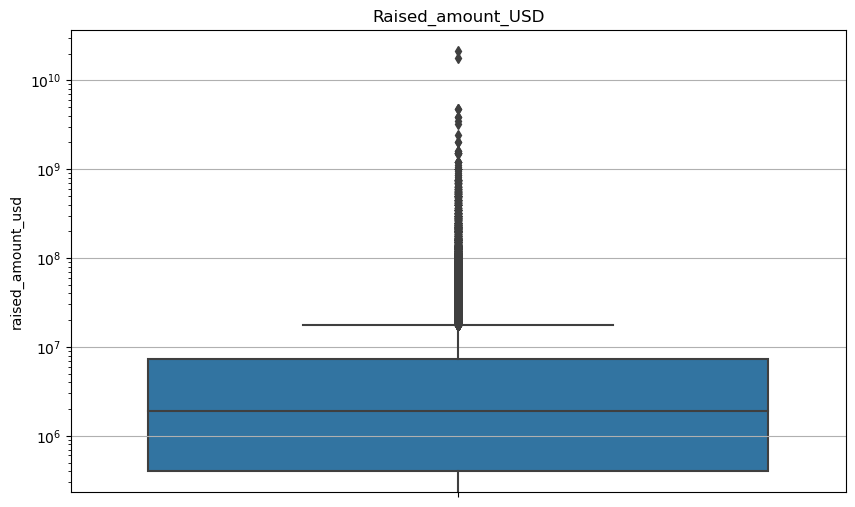

In [8]:
#box plots to check the raised amounts stats
plt.figure(figsize = (10,6))
plt.grid()
sns.boxplot(y = df.raised_amount_usd)
plt.title("Raised_amount_USD")
plt.yscale('log')
plt.show()

In [9]:
#common stats of raised amount
df.describe()

,raised_amount_usd
count,8.407800e+04
mean,9.861962e+06
std,1.080503e+08
min,0.000000e+00
25%,4.000000e+05
50%,1.900000e+06
75%,7.250000e+06
max,2.127194e+10


The mean amount is about `9.8 million USD` and the median amount is `1.9 million USD`

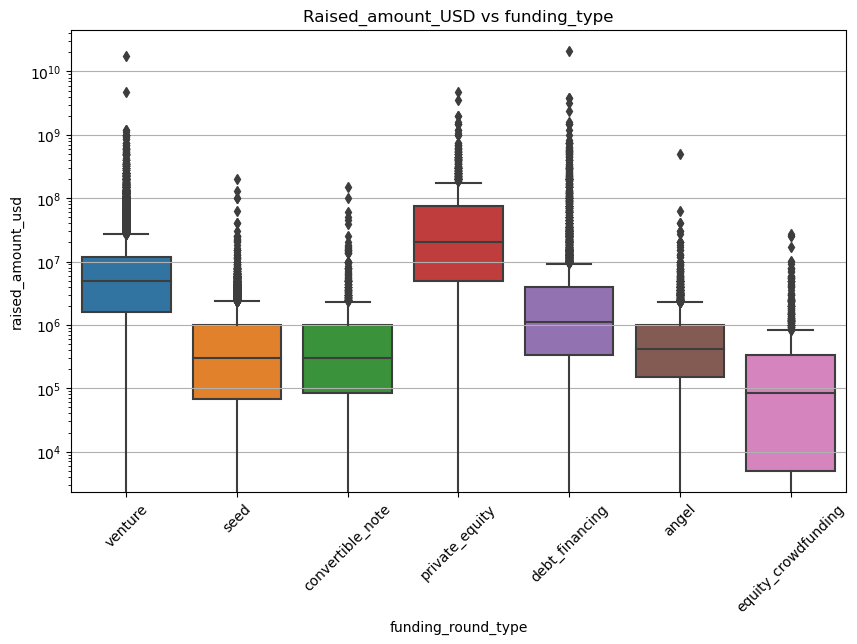

In [10]:
#checking the summary stats for various investment types
plt.figure(figsize = (10,6))
plt.grid()
sns.boxplot(y = df.raised_amount_usd, x = df.funding_round_type)
plt.yscale('log')
plt.title('Raised_amount_USD vs funding_type')
plt.xticks(rotation = 45)
plt.show()

In [11]:
#checking the summary stats
pd.pivot_table(data = df, values = 'raised_amount_usd', columns = 'funding_round_type',
              aggfunc = np.mean)

funding_round_type,angel,convertible_note,debt_financing,equity_crowdfunding,private_equity,seed,venture
raised_amount_usd,971573.891136,1.337187e+06,1.716765e+07,509897.967199,7.393849e+07,747793.682484,1.172422e+07


In [12]:
pd.pivot_table(data = df, values = 'raised_amount_usd', columns = 'funding_round_type',
              aggfunc = np.median)

funding_round_type,angel,convertible_note,debt_financing,equity_crowdfunding,private_equity,seed,venture
raised_amount_usd,414906.0,300000.0,1096653.0,85000.0,20000000.0,300000.0,5000000.0


We see the average and median funding amount have huge differences. This is because of outliers in 
the data. So its more appropriate to choose the `median` value to get the basic stat
of each funding_type

In [13]:
#checking the median values in order
print(df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending = False))

funding_round_type
private_equity         20000000.0
venture                 5000000.0
debt_financing          1096653.0
angel                    414906.0
convertible_note         300000.0
seed                     300000.0
equity_crowdfunding       85000.0
Name: raised_amount_usd, dtype: float64


The private_equity type funding has a median funding type of about `20 MM USD`
this is beyond the range of Sparks Fund.

The most suitable is venture type funding which has a median amount of `5 MM USD`

The rest all are less than the amount Sparks Funds are looking to invest.

In [14]:
# reducing the data frame to only contain venture type funds
df = df[df['funding_round_type'] == 'venture']

#checking 
df.funding_round_type.value_counts()

venture    47809
Name: funding_round_type, dtype: int64

We have successfully deleted other funding types

## 2. Country Analysis
        
       This analysis requires those countries where english is the official language or 
       common speaking language
       

In [15]:
#checking the dataframe
df.shape

(47809, 9)

In [16]:
country_wise_investments = df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending = False)

In [17]:
#Lets check where the most investments are occuring
country_wise_investments[:10]

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
SWE    3.145857e+09
Name: raised_amount_usd, dtype: float64

Out of the top ten companies `USA`, `GBR`, `IND`, `CAN` are the top english speaking countries
or countries with official language as english.

In [18]:
top_4 = ['USA', 'GBR', 'IND', 'CAN']

In [19]:
#reducing the data frame to include only these companies
df = df[df['country_code'].isin(top_4)]
df.shape


(40049, 9)

The reduction leaves us with `40049` companies out of `47809`

In [20]:
#checking median investment amount of the countries
pd.pivot_table(data = df, values = 'raised_amount_usd', columns = 'country_code',
              aggfunc = np.median)

country_code,CAN,GBR,IND,USA
raised_amount_usd,4000000.0,4260000.0,7500000.0,5000000.0


In [21]:
#checking investments in various comapanies by country and status of the company
pd.pivot_table(data = df, values = 'raised_amount_usd', columns = ['country_code', 'status'],
              aggfunc = np.median)

country_code             CAN                                         GBR  \
status              acquired     closed        ipo  operating   acquired   
raised_amount_usd  5711912.0  4880000.0  4124454.0  3800000.0  8272447.0   

country_code                                                IND             \
status                closed         ipo  operating    acquired     closed   
raised_amount_usd  2991619.0  12550010.0  3952278.0  10000000.0  8750000.0   

country_code                                    USA                         \
status                    ipo  operating   acquired     closed         ipo   
raised_amount_usd  13000000.0  7000000.0  7600000.0  5000000.0  11100000.0   

country_code                  
status             operating  
raised_amount_usd  4250000.0

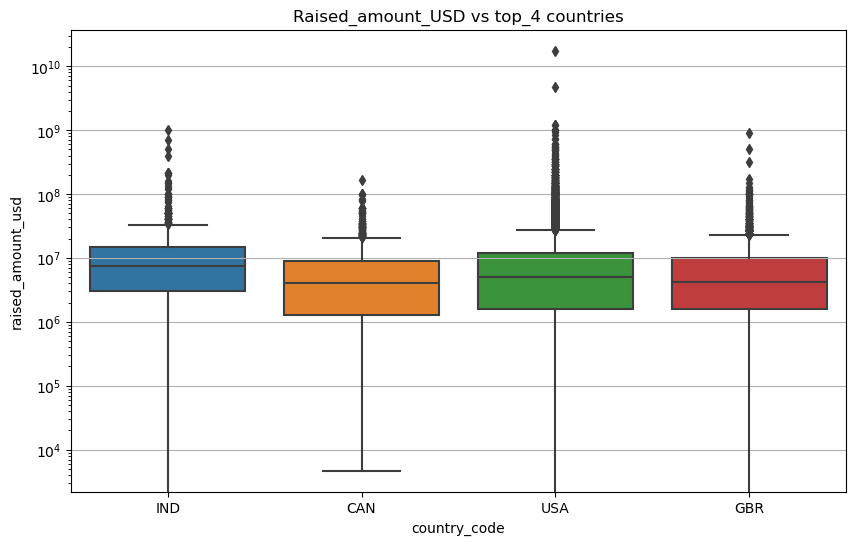

In [22]:
#checking some plots
plt.figure(figsize = (10,6))
plt.grid()
sns.boxplot(y = df['raised_amount_usd'],  x = df['country_code'])
plt.title("Raised_amount_USD vs top_4 countries")
plt.yscale('log')
plt.show()

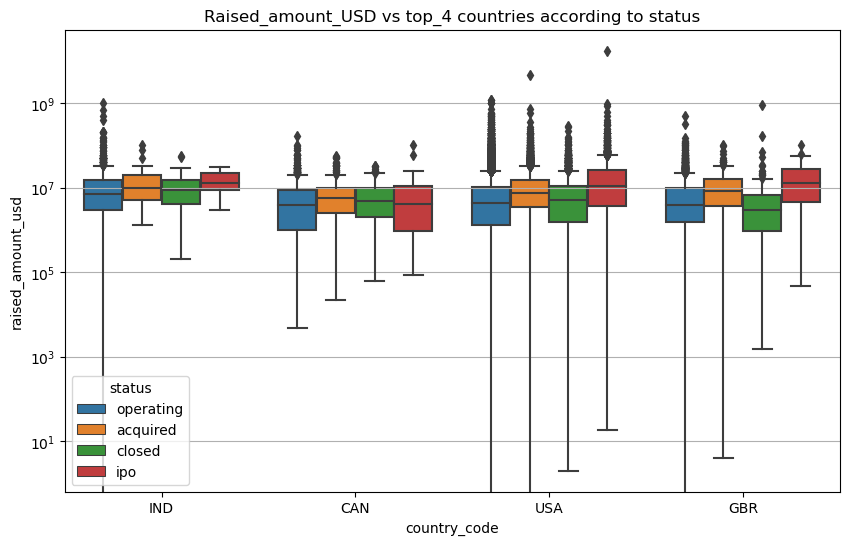

In [23]:
#checking investments in companies according to status of the company
plt.figure(figsize = (10,6))
plt.grid()
sns.boxplot(y = df['raised_amount_usd'],  x = df['country_code'], hue = df['status'])
plt.title("Raised_amount_USD vs top_4 countries according to status")
plt.yscale('log')
plt.show()

It shows `IND` has the highest median investments among all countries with `7.5 MM USD`.
This is followed by `USA`, `GBR` and `CAN`

We also plotted a graph for the companies with present status. 
Although we are not needed to know the status but we should be able to check which are operating and those that 
are closed.

We will check on this after checking the sectorwise analysis

## 3. Sector-wise Analysis

       There is a mapping file for mapping the sectors into some categories.
       But first lets check the category_list of the dataframe 

In [24]:
df.category_list.value_counts()

Biotechnology                                                                                      4797
Software                                                                                           3370
Health Care                                                                                        1239
Clean Technology                                                                                   1095
Enterprise Software                                                                                1051
                                                                                                   ... 
Security|Software|Wireless                                                                            1
Content|Maps|Ticketing|Tourism|Travel|Travel & Tourism                                                1
Cloud Computing|Enterprise Software|Infrastructure                                                    1
Fitness|Healthcare Services|Pharmaceuticals                     

There are some entries where we have multiple categories. Where some have sub_categories.
The `first` name must be the `main category` and this must be used to merge with mapping file

In [25]:
#getting the first name of the multiple category entries
df['category_list'].apply(lambda x : x.split('|')[0]).value_counts()

Biotechnology          6068
Software               3483
Advertising            1892
Enterprise Software    1617
Health Care            1615
                       ... 
High Tech                 1
Rapidly Expanding         1
Video Conferencing        1
Debt Collecting           1
Task Management           1
Name: category_list, Length: 569, dtype: int64

It seems to be working

In [26]:
#replacing the category list columns
df['category_list'] = df['category_list'].apply(lambda x : x.split('|')[0])

In [27]:
#checking
df['category_list'].value_counts()

Biotechnology          6068
Software               3483
Advertising            1892
Enterprise Software    1617
Health Care            1615
                       ... 
High Tech                 1
Rapidly Expanding         1
Video Conferencing        1
Debt Collecting           1
Task Management           1
Name: category_list, Length: 569, dtype: int64

In [28]:
#checking everything else is intact
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0


In [29]:
#lets for the sake of not messing with case errors convert the category_list to lower case
df['category_list'] = df['category_list'].apply(lambda x : x.lower())

In [30]:
#checking everything else is intact
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
7,/organization/0xdata,H2O.ai,analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
9,/organization/0xdata,H2O.ai,analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0


In [31]:
#now lets check the mapping file.
mapping_path = '/Users/manish/Documents/Projects/data_science/investment_strategy/data/raw_data/mapping.csv'

mapping  = pd.read_csv(mapping_path)

In [32]:
#checking for null values
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


Mapping file has `10` columns for various categories, where `category_list` columnn has `1 missing value`
Lets check that entry

In [33]:
mapping[mapping['category_list'].isnull()]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0


In [34]:
#dropping the null column
mapping = mapping[~mapping['category_list'].isnull()]

In [35]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      687 non-null    int64 
 2   Blanks                                   687 non-null    int64 
 3   Cleantech / Semiconductors               687 non-null    int64 
 4   Entertainment                            687 non-null    int64 
 5   Health                                   687 non-null    int64 
 6   Manufacturing                            687 non-null    int64 
 7   News, Search and Messaging               687 non-null    int64 
 8   Others                                   687 non-null    int64 
 9   Social, Finance, Analytics, Advertising  687 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 59.0+ KB


Now mapping file has 9 column with no null values

In [36]:
#converting category_list to lower case
mapping.category_list = mapping.category_list.apply(lambda x : x.lower())

### Checking the mapping file with df

In [37]:
#lets check whether each category in df is present in mapping file
df[~df['category_list'].isin(mapping.category_list)]['category_list'].value_counts()

analytics                          1369
finance                             575
nanotechnology                      143
financial services                  107
big data analytics                   93
career management                    61
cloud management                     43
event management                     26
finance technology                   23
contact management                   21
it management                        20
document management                  19
identity management                  19
business analytics                   16
investment management                13
digital signage                      11
risk management                      10
energy management                     9
project management                    8
innovation management                 7
supply chain management               6
navigation                            6
lead management                       5
cannabis                              5
property management                   5


It seems those that have management, analytics, finance are mostly not present in mapping file
This seems odd as these are valid categories.
Lets check the mapping file category list that are not present in df.

In [38]:
#checking category list in mapping that are not present in df
mapping[~mapping.category_list.isin(df.category_list)].category_list.value_counts()[:20]

air pollution control          1
postal and courier services    1
performance marketing          1
perso0l branding               1
perso0l data                   1
perso0l fi0nce                 1
perso0l health                 1
perso0lization                 1
pervasive computing            1
plumbers                       1
pre seed                       1
realtors                       1
predictive a0lytics            1
private social networking      1
productivity                   1
professio0l networking         1
professio0l services           1
project ma0gement              1
promotio0l                     1
property ma0gement             1
Name: category_list, dtype: int64

We see a pattern here that `0` are present within strings which seems to be in place of `na`

In [39]:
#lets rectify this
mapping.category_list = mapping.category_list.apply(lambda x : x.replace('0', 'na'))

In [40]:
#checking category list in mapping that are not present in df
mapping[~mapping.category_list.isin(df.category_list)].category_list.value_counts()

air pollution control    1
aquaculture              1
shared services          1
senior health            1
ride sharing             1
                        ..
high school students     1
hedge funds              1
handmade                 1
group sms                1
women                    1
Name: category_list, Length: 128, dtype: int64

In [41]:
#lets check whether each category in df is now present in mapping file
df[~df['category_list'].isin(mapping.category_list)]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
15903,/organization/clean-vehicle-solutions,Clean Vehicle Solutions,natural gas uses,operating,USA,/funding-round/7b991c526219c2edff8789942215d93b,venture,26-02-2010,125000.0
17993,/organization/consensus-point,Consensus Point,enterprise 2.0,operating,USA,/funding-round/11ad1d209af6e06e87467f3432aa735f,venture,19-04-2011,788374.0
17995,/organization/consensus-point,Consensus Point,enterprise 2.0,operating,USA,/funding-round/7cdac9335cdc78285e8dcd1932f8729b,venture,18-07-2012,2600000.0
22354,/organization/dolores-speech-products,Dolores Speech Products,adaptive equipment,operating,USA,/funding-round/ba7393d89b2a5ad0c076e2295794c4ce,venture,07-04-2015,250000.0
27532,/organization/fia-formula-e,FIA Formula E,racing,closed,GBR,/funding-round/19a09624fcf806a4a64809462a4e391c,venture,15-05-2014,68569234.0
28076,/organization/five-below,Five Below,specialty retail,ipo,USA,/funding-round/2a50c59492585ea4080fa67de755a442,venture,14-10-2010,194000000.0
28281,/organization/flexport,Flexport,enterprise 2.0,operating,USA,/funding-round/e890e1058ab6be04e9559cd34ee6382c,venture,06-08-2015,20000000.0
33669,/organization/healthtell,HealthTell,biotechnology and semiconductor,operating,USA,/funding-round/8edf7332fface9972541807a248690b3,venture,13-06-2014,9486929.0
40079,/organization/justinmind,Justinmind,rapidly expanding,operating,USA,/funding-round/c6e9adcef86247dccf8418dc3e4b9a0b,venture,17-12-2007,862000.0
54109,/organization/omega-point-research,Omega Point Research,product search,closed,USA,/funding-round/4870743e3fded9317f5611eb2e848667,venture,14-05-2015,3172815.0


In [42]:
#lets check these index in the original master file
index_to_check = df[~df['category_list'].isin(mapping.category_list)].index

In [43]:
len(index_to_check)

15

In [44]:
#checking the data against the status and name
pd.pivot_table(data = master.iloc[index_to_check,:],
              columns = ['status', 'name', 'category_list'])

status                   closed                                          \
name              FIA Formula E Omega Point Research ShantiNiketan Inc.   
category_list            Racing       Product Search         Retirement   
raised_amount_usd    68569234.0            3172815.0          1550000.0   

status                         ipo  \
name                    Five Below   
category_list     Specialty Retail   
raised_amount_usd      194000000.0   

status                                              operating  \
name                                  Clean Vehicle Solutions   
category_list     Natural Gas Uses|Service Providers|Services   
raised_amount_usd                                    125000.0   

status                                                                \
name                                                 Consensus Point   
category_list     Enterprise 2.0|Enterprise Software|Market Research   
raised_amount_usd                                          1694187.0   

status                                                                                    \
name                                                             Dolores Speech Products   
category_list     Adaptive Equipment|Innovation Management|Speech Recognition|Technology   
raised_amount_usd                                           250000.0                       

status                                                                                                                                                  \
name                                                                                                                                          Flexport   
category_list     Enterprise 2.0|Enterprise Software|Insurance|Logistics|Shipping|Shipping Broker Industry|Software Compliance|Supply Chain Management   
raised_amount_usd                                         20000000.0                                                                                     

status                                                                                                           \
name                                                                                                 HealthTell   
category_list     Biotechnology and Semiconductor|Diagnostics|Health and Wellness|Life Sciences|Personal Health   
raised_amount_usd                                          9486929.0                                              

status                                                                         \
name                                                               Justinmind   
category_list     Rapidly Expanding|Software|Usability|User Experience Design   
raised_amount_usd                                           862000.0            

status                                                         \
name                                    Onspring Technologies   
category_list     Enterprise 2.0|Enterprise Software|Software   
raised_amount_usd                                   2000000.0   

status                                                                                    \
name                                                                               Sense   
category_list     GreenTech|Hardware|Home Automation|Internet of Things|Sensors|Software   
raised_amount_usd                                          2499999.0                       

status                                               
name                                       Velocomp  
category_list     Adaptive Equipment|Sporting Goods  
raised_amount_usd                         1420000.0

We see there are 15 companies which do not have categories in the mapping file we can either impute them 
or delete them.

The raised amount in Velocomp, Sense, Onspring Technologies, Healthtell, Consensus Point, ShantiNiketan Inc. 
have investments in the SFs range.

Lets work on these entries

In [45]:
#companies to work on
list_companies =['Velocomp', 'Sense', 'Onspring Technologies', 'HealthTell', 
                 'Consensus Point']

In [46]:
df[df.name.isin(list_companies)]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
17993,/organization/consensus-point,Consensus Point,enterprise 2.0,operating,USA,/funding-round/11ad1d209af6e06e87467f3432aa735f,venture,19-04-2011,788374.0
17995,/organization/consensus-point,Consensus Point,enterprise 2.0,operating,USA,/funding-round/7cdac9335cdc78285e8dcd1932f8729b,venture,18-07-2012,2600000.0
33669,/organization/healthtell,HealthTell,biotechnology and semiconductor,operating,USA,/funding-round/8edf7332fface9972541807a248690b3,venture,13-06-2014,9486929.0
54631,/organization/onspring-technologies,Onspring Technologies,enterprise 2.0,operating,USA,/funding-round/41915df9cc7f5d0ddb603e4671a4b9fe,venture,01-01-2015,2000000.0
67761,/organization/sense-labs-inc-,Sense,greentech,operating,USA,/funding-round/1ed09dae5b9feaba2ae7f56dd1b9bfd2,venture,29-12-2014,2499999.0
81761,/organization/velocomp,Velocomp,adaptive equipment,operating,USA,/funding-round/2cdceb89206aad240a78e58329cec171,venture,09-09-2011,1420000.0


THe enterprise 2.0 category is present in the csv file but not in the data frame meaning 
this means when we converte 0's to na it became enterprise 2.na

    We have to convert it to enterprise 2.0
    
    Also the greentech can be converted to green as it is a software company/clean tech as can be 
    seen from the master file.
    
    Adaptive equipment can be change to sporting goods as sporting goods is present in mapping file
    
    We can convert biotechnology and semiconductors to biotechnology
    

In [47]:
#checking our first assumption
mapping.loc[mapping.category_list == 'enterprise 2.na']

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
243,enterprise 2.na,0,0,0,0,0,0,0,1,0


In [48]:
#replacing it
mapping.category_list = mapping.category_list.apply(lambda x : x.replace('enterprise 2.na' ,
                                                                         'enterprise 2.0'))
mapping.loc[mapping.category_list == 'enterprise 2.0']

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
243,enterprise 2.0,0,0,0,0,0,0,0,1,0


    Now lets convert rest of the categories in df

In [49]:
#checking greentech loc
df.loc[df.category_list == 'greentech']

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
67761,/organization/sense-labs-inc-,Sense,greentech,operating,USA,/funding-round/1ed09dae5b9feaba2ae7f56dd1b9bfd2,venture,29-12-2014,2499999.0


In [50]:
#replace greentech to green
df.category_list = df.category_list.apply(lambda x : x.replace('greentech' ,
                                                                         'green'))
df.loc[df.category_list == 'green']

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
67761,/organization/sense-labs-inc-,Sense,green,operating,USA,/funding-round/1ed09dae5b9feaba2ae7f56dd1b9bfd2,venture,29-12-2014,2499999.0


In [51]:
#replacing adaptive equipment by sports good
df.loc[df.category_list == 'adaptive equipment']

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
22354,/organization/dolores-speech-products,Dolores Speech Products,adaptive equipment,operating,USA,/funding-round/ba7393d89b2a5ad0c076e2295794c4ce,venture,07-04-2015,250000.0
81761,/organization/velocomp,Velocomp,adaptive equipment,operating,USA,/funding-round/2cdceb89206aad240a78e58329cec171,venture,09-09-2011,1420000.0


In [52]:
#here is an issue as adaptive technology is present in dolores speech products and velocomp
#but since we have only chosen velocomp we drop dolores speech
df = df.loc[df.name != 'Dolores Speech Products']

In [53]:
#checking
df.loc[df.name == 'Dolores Speech Products']

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd


In [54]:
#replacing adaptive equipment by sports good
df.loc[df.category_list == 'adaptive equipment']

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
81761,/organization/velocomp,Velocomp,adaptive equipment,operating,USA,/funding-round/2cdceb89206aad240a78e58329cec171,venture,09-09-2011,1420000.0


In [55]:
df.category_list = df.category_list.apply(lambda x : x.replace('adaptive equipment',
                                                               'sporting goods'))

In [56]:
#checking
df.loc[df.category_list == 'sporting goods']

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
29002,/organization/fortified-bicycle,FORTIFIED Bicycle,sporting goods,operating,USA,/funding-round/30eb5c60879976960b777c0fe0b161c5,venture,19-07-2014,800000.0
59757,/organization/pow,POW,sporting goods,operating,USA,/funding-round/78ae99902ddceea4cee7480f42770abb,venture,24-09-2014,2500000.0
81761,/organization/velocomp,Velocomp,sporting goods,operating,USA,/funding-round/2cdceb89206aad240a78e58329cec171,venture,09-09-2011,1420000.0


In [57]:
#replacing biotechnolgy and semiconductors
df.loc[df.category_list == 'biotechnology and semiconductor']

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
33669,/organization/healthtell,HealthTell,biotechnology and semiconductor,operating,USA,/funding-round/8edf7332fface9972541807a248690b3,venture,13-06-2014,9486929.0


In [58]:
df.category_list = df.category_list.apply(lambda x : x.replace('biotechnology and semiconductor',
                                                               'biotechnology'))

df.loc[df.name == 'HealthTell']

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
33669,/organization/healthtell,HealthTell,biotechnology,operating,USA,/funding-round/8edf7332fface9972541807a248690b3,venture,13-06-2014,9486929.0


    Now lets check the df file again
    

In [59]:
#lets check whether each category in df is now present in mapping file
df[~df['category_list'].isin(mapping.category_list)]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
15903,/organization/clean-vehicle-solutions,Clean Vehicle Solutions,natural gas uses,operating,USA,/funding-round/7b991c526219c2edff8789942215d93b,venture,26-02-2010,125000.0
27532,/organization/fia-formula-e,FIA Formula E,racing,closed,GBR,/funding-round/19a09624fcf806a4a64809462a4e391c,venture,15-05-2014,68569234.0
28076,/organization/five-below,Five Below,specialty retail,ipo,USA,/funding-round/2a50c59492585ea4080fa67de755a442,venture,14-10-2010,194000000.0
40079,/organization/justinmind,Justinmind,rapidly expanding,operating,USA,/funding-round/c6e9adcef86247dccf8418dc3e4b9a0b,venture,17-12-2007,862000.0
54109,/organization/omega-point-research,Omega Point Research,product search,closed,USA,/funding-round/4870743e3fded9317f5611eb2e848667,venture,14-05-2015,3172815.0
68301,/organization/shantiniketan-incorporated,ShantiNiketan Inc.,retirement,closed,USA,/funding-round/96f7fa1fdcc380649723c8effc2a1062,venture,01-08-2008,1100000.0
68302,/organization/shantiniketan-incorporated,ShantiNiketan Inc.,retirement,closed,USA,/funding-round/c6baca436fa80360921d89a06a0a0e93,venture,01-05-2011,2000000.0


In [60]:
df[~df['category_list'].isin(mapping.category_list)].shape

(7, 9)

In [61]:
df.shape

(40048, 9)

In [62]:
#dropping these columns
df = df[df['category_list'].isin(mapping.category_list)]
df.shape

(40041, 9)

In [63]:
#lets check again
df[~df['category_list'].isin(mapping.category_list)]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd


In [64]:
#also dropping those categories in mapping file which are not in the df file 
mapping.shape

(687, 10)

In [65]:
mapping[~mapping.category_list.isin(df.category_list)].shape

(126, 10)

In [66]:
mapping = mapping[mapping.category_list.isin(df.category_list)]

print(mapping.shape)
mapping[~mapping.category_list.isin(df.category_list)].shape

(561, 10)


(0, 10)

    so we have succesfully cleaned all the columns and now we can do the merge

### Merging the mapping and df files on category_list

In [67]:
df = pd.merge(df, mapping, on = 'category_list')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40041 entries, 0 to 40040
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   permalink                                40041 non-null  object 
 1   name                                     40041 non-null  object 
 2   category_list                            40041 non-null  object 
 3   status                                   40041 non-null  object 
 4   country_code                             40041 non-null  object 
 5   funding_round_permalink                  40041 non-null  object 
 6   funding_round_type                       40041 non-null  object 
 7   funded_at                                40041 non-null  object 
 8   raised_amount_usd                        40041 non-null  float64
 9   Automotive & Sports                      40041 non-null  int64  
 10  Blanks                                   40041

In [68]:
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,media,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,media,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,media,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,0,0,0,1,0,0,0,0,0


    The merging resulted in a wide format for the sectors
    
    We can use pd.melt function to convert them into long format  
    Now for that we need the sectors from the mapping file as value_vars
    and rest of the columns as id_vars
    
    Keep the values column obtained thus, where values are 1
    Convert the variable column to sector
    check the shape of the dataframe again

In [69]:
#setting value vars and id_vars
value_vars = list(mapping.drop(columns = ['category_list'], axis =1).columns)
id_vars = list(df.drop(columns = value_vars, axis = 1).columns)
print(value_vars)
print('--'*20)
print(id_vars)

['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']
----------------------------------------
['permalink', 'name', 'category_list', 'status', 'country_code', 'funding_round_permalink', 'funding_round_type', 'funded_at', 'raised_amount_usd']


In [70]:
long_df = pd.melt(frame = df, id_vars = id_vars, value_vars = value_vars)

In [71]:
long_df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,variable,value
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Automotive & Sports,0
1,/organization/90min,90min,media,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Automotive & Sports,0
2,/organization/90min,90min,media,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Automotive & Sports,0
3,/organization/90min,90min,media,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,Automotive & Sports,0
4,/organization/all-def-digital,All Def Digital,media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Automotive & Sports,0


In [72]:
long_df.shape

(360369, 11)

In [73]:
#dropping where values are 0 and dropping the value column
long_df = long_df[long_df.value == 1]
long_df = long_df.drop(columns = ['value'], axis =1)
long_df.shape

(40041, 10)

In [74]:
#renaming the variable column to sector
long_df = long_df.rename(columns = {'variable' : 'sector'})

    We have succesfully managed to convert to long format as the shape is same as our original df.
    We also have set a new column called sector where we can do our final analysis.
    
    Now our only job left is to find the companies where the range of investment is in the range of 
    5 - 15 MM USD

In [75]:
#changing the final df
df = long_df[(long_df.raised_amount_usd >= 5000000) & (long_df.raised_amount_usd <= 15000000)]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,sector
26612,/organization/3d-robotics,3D Robotics,drones,operating,USA,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,05-11-2012,5000000.0,Automotive & Sports
26613,/organization/3d-robotics,3D Robotics,drones,operating,USA,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,23-04-2015,14000000.0,Automotive & Sports
26616,/organization/cape-productions,Cape Productions,drones,operating,USA,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,13-10-2015,10000000.0,Automotive & Sports
26617,/organization/dronedeploy,DroneDeploy,drones,operating,USA,/funding-round/bdf644f3fa66533c048719bf0d000893,venture,31-03-2015,9000000.0,Automotive & Sports
26620,/organization/ehang,Ehang,drones,operating,USA,/funding-round/cf1321bcd5745aade7e99eedaaa26ded,venture,30-12-2014,10000000.0,Automotive & Sports


### Some final statistical analysis


In [76]:
sector_wise_df = df.groupby(['country_code', 'sector']).raised_amount_usd.agg(['sum', 'mean', 
                                                                              'median', 'count'])

In [82]:
sector_wise_df

                                                               sum  \
country_code sector                                                  
CAN          Automotive & Sports                      1.500000e+07   
             Cleantech / Semiconductors               1.015888e+09   
             Entertainment                            1.600221e+08   
             Health                                   1.683451e+08   
             Manufacturing                            2.376331e+08   
             News, Search and Messaging               4.201211e+08   
             Others                                   9.261380e+08   
             Social, Finance, Analytics, Advertising  6.561431e+08   
GBR          Automotive & Sports                      1.670516e+08   
             Cleantech / Semiconductors               1.163990e+09   
             Entertainment                            4.827847e+08   
             Health                                   2.145375e+08   
             Manufac

In [78]:
#sector_wise_df.to_csv('final_report.csv', index = True)

Text(0.5, 1.0, 'Total Invested Amount (USD)')

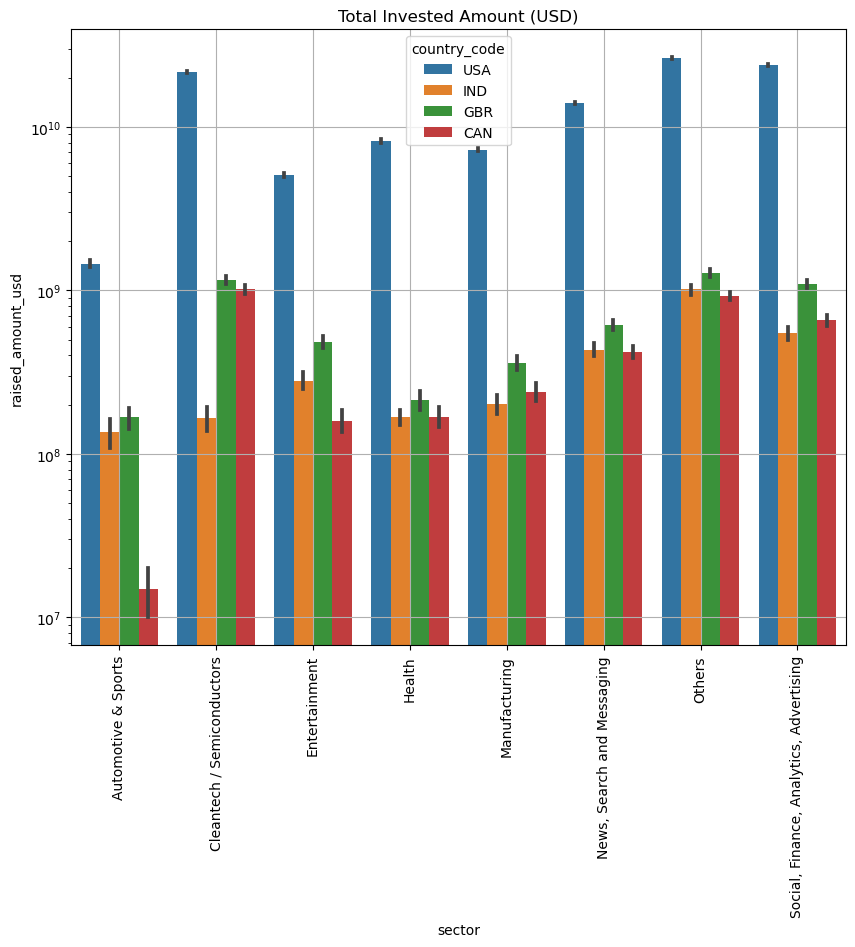

In [79]:
plt.figure(figsize = (10,8))
sns.barplot(x='sector', y='raised_amount_usd', hue='country_code', data=df, estimator=np.sum)
plt.yscale('log')
plt.xticks(rotation = 90)
plt.grid()
plt.title('Total Invested Amount (USD)')

Text(0.5, 1.0, 'Number of Investments')

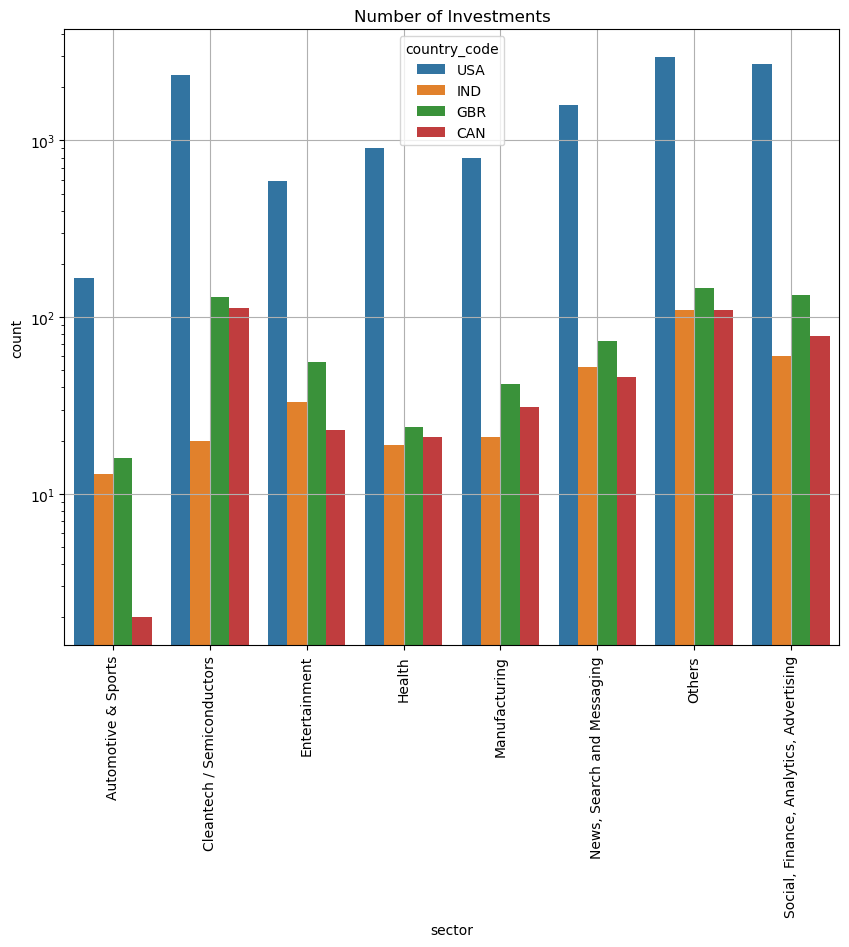

In [80]:
plt.figure(figsize = (10,8))
sns.countplot(x='sector', hue='country_code', data=df)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.grid()
plt.title('Number of Investments')

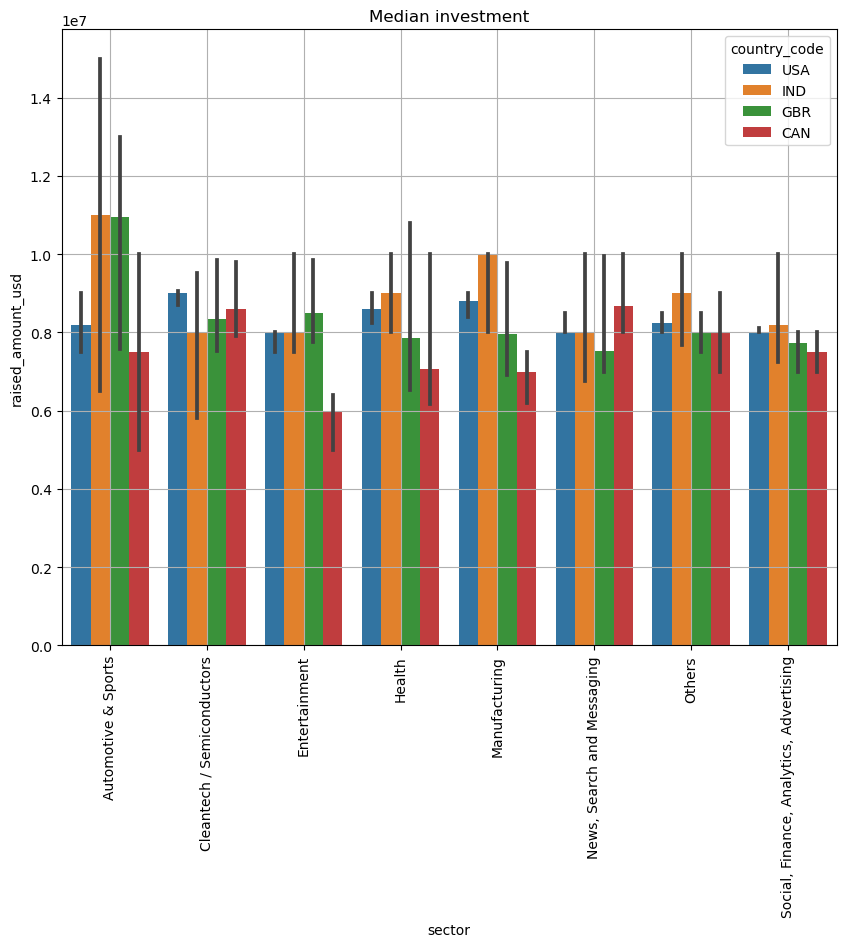

In [81]:
plt.figure(figsize = (10,8))
sns.barplot(x='sector', y='raised_amount_usd', hue='country_code', data=df, estimator=np.median)
plt.xticks(rotation = 90)
plt.grid()
plt.title('Median investment')
plt.show()

    1. In CAN highest amount is invested in cleantech/semiconductores followed by others.
       With median investment of 9.07 MM USD and 8.5 MM USD respectively.
       Total companies are 112 and 109 respectively
       
    2. In GBR highest amount invested is in others followed by cleantech/semiconductors.
       Median investment is about 8.73 and 8.95 MM USD respectively.
       Total companies are 147 and 130 respectively.
    
    3. In IND most investments are in others category followed by Social, Finance, Analytics, Advertising.
       Median investment of 9.21 and 9.18 MM USD respectively.
       Total companies are 110 and 60 respectively.
    
    4. USA is the leading hub for companies and investments. 
       With Others leading followed by Social, Finance, Analytics, Advertising.
       Median investment are 8.92 and 8.77 MM USD respectively.
       Total companies count is also very high with 2950 and 2714 respectively
    
#### Note. All these investments are of English speaking countries with venture type funding between 5 to 15 MM USD of investments each.
    
    
  
       